In [60]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data_train = pd.read_table('training.txt', sep = ' ', header = None, names = ['doc_id','feature_index','tf-idf'])

In [46]:
len_data_train = data_train['doc_id'].max()
len_data_train

1842

In [47]:
data_test = pd.read_table('testing.txt', sep = ' ', header = None, names = ['doc_id','feature_index','tf-idf'])

In [48]:
data_test['doc_id'] = data_test['doc_id'].map(lambda x : x + len_data_train)

In [49]:
merged_train_test_data = data_train.copy()
merged_train_test_data = merged_train_test_data.append(data_test.copy(), ignore_index=True)
#merged_train_test_data # max(merged_train_test_data['doc_id']) = 2794 (1842 + 952)

In [50]:
merged_doc_feature_train_test = merged_train_test_data.pivot('doc_id', columns = 'feature_index', values = 'tf-idf')
merged_doc_feature_train_test = merged_doc_feature_train_test.fillna(0.0)
#merged_doc_feature_train_test

In [51]:
doc_feature_df_train = merged_doc_feature_train_test[0:len_data_train]
#doc_feature_df_train

In [52]:
doc_feature_df_test = merged_doc_feature_train_test[len_data_train:]
#doc_feature_df_test

In [53]:
doc_class_df_train = pd.read_table('label_training.txt', sep = ' ', header = None, names = ['label'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(doc_feature_df_train, doc_class_df_train.label, stratify=doc_class_df_train.label, random_state=123)

In [57]:
def benchmark(clf, clf_name):
    print('_' * 80)
    print("Training: ")
    print(clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)
    
    results.append((clf_name, fpr, tpr, roc_auc))
    
    score = metrics.accuracy_score(y_test, y_pred)
    print("accuracy:   %0.6f" % score)

In [58]:
results = []
gnb = GaussianNB()
benchmark(gnb, 'GaussianNB')
mnb = MultinomialNB(alpha=.01)
benchmark(mnb, 'MultinomialNB')
bnb = BernoulliNB(alpha=.01)
benchmark(bnb, 'BernoulliNB')

________________________________________________________________________________
Training: 
GaussianNB()
accuracy:   0.984816
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
accuracy:   0.997831
________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
accuracy:   0.993492


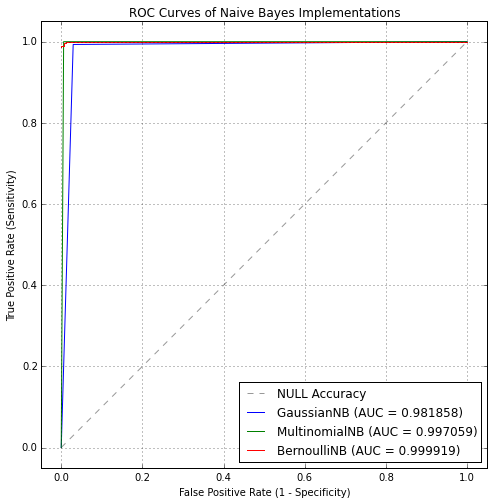

In [62]:
# plot the ROC Curves
plt.figure(figsize=(8,8))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')

for clf_name, fpr, tpr, roc_auc in results:
    plt.plot(fpr, tpr, lw=1, label='%s (AUC = %0.6f)' % (clf_name, roc_auc))

plt.title('ROC Curves of Naive Bayes Implementations')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
clf_final = MultinomialNB(alpha=.01)
clf_final.fit(X_train, y_train.label)
y_test_pred = clf_final.predict(doc_feature_df_test)

In [ ]:
np.savetxt('720004946-1.txt', y_test_pred, delimiter='\n', fmt='%d')